In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [45]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

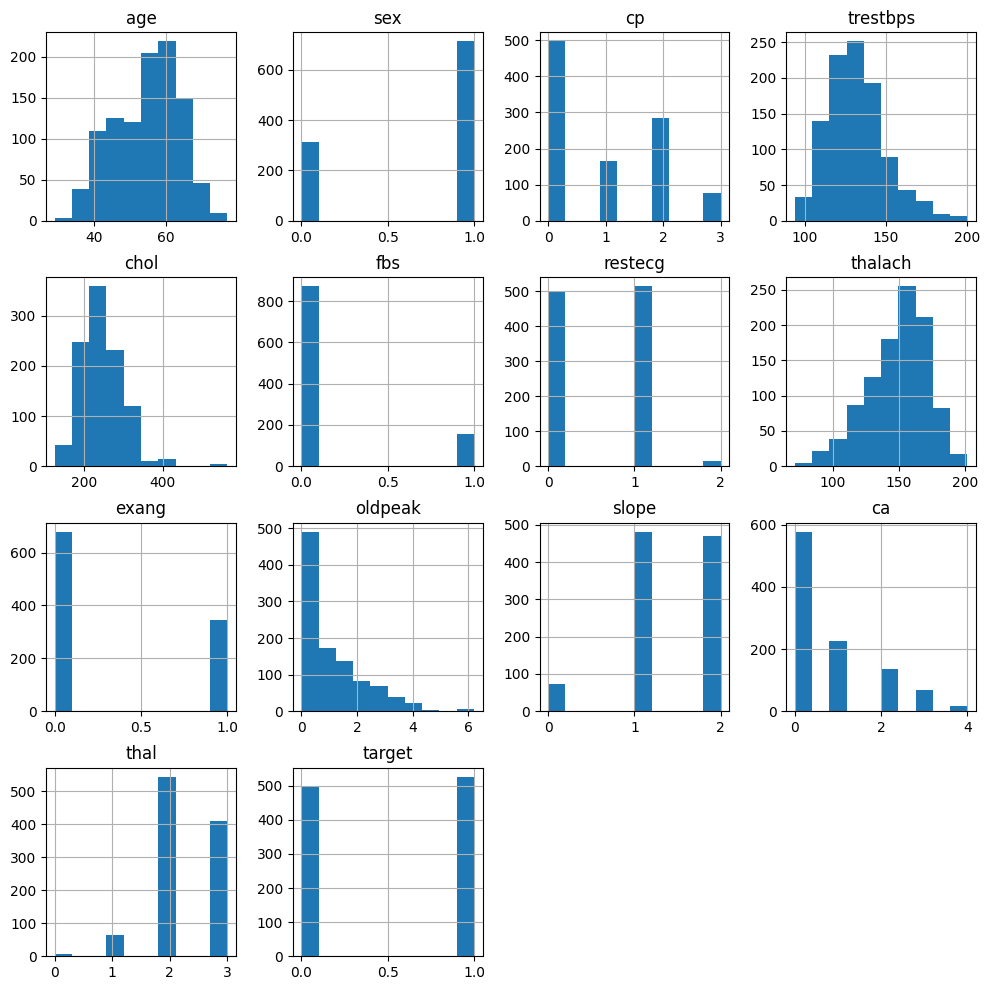

In [46]:
df.hist(figsize=(12, 12))

In [47]:
# check for skeweness
df.skew().sort_values(ascending=False)

fbs         1.971339
ca          1.261189
oldpeak     1.210899
chol        1.074073
trestbps    0.739768
exang       0.692655
cp          0.529455
restecg     0.180440
target     -0.052778
age        -0.248866
slope      -0.479134
thalach    -0.513777
thal       -0.524390
sex        -0.851449
dtype: float64

In [48]:
# Columns "sex" and "fbs" are skewed, but they are binary columns
skewed_cols = ['ca', 'oldpeak', 'chol', 'trestbps', 'thalach']
for col in skewed_cols:
    df[col] = np.log1p(df[col])
    
df.skew().sort_values(ascending=False)

fbs         1.971339
ca          0.705122
exang       0.692655
cp          0.529455
oldpeak     0.357909
trestbps    0.304969
restecg     0.180440
chol        0.082214
target     -0.052778
age        -0.248866
slope      -0.479134
thal       -0.524390
sex        -0.851449
thalach    -0.979713
dtype: float64

<Axes: >

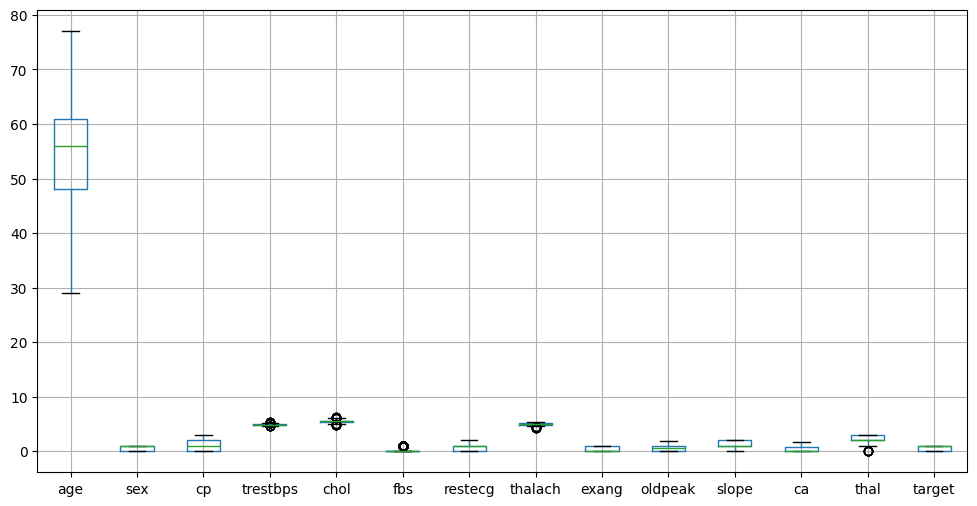

In [49]:
df.boxplot(figsize=(12, 6))

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,4.836282,5.361292,0,1,5.129899,0,0.693147,2,1.098612,3,0
1,53,1,0,4.948760,5.318120,1,0,5.049856,1,1.410987,0,0.000000,3,0
2,70,1,0,4.983607,5.164786,0,1,4.836282,1,1.280934,0,0.000000,3,0
3,61,1,0,5.003946,5.318120,0,1,5.087596,0,0.000000,2,0.693147,3,0
4,62,0,0,4.934474,5.686975,1,1,4.672829,0,1.064711,1,1.386294,2,0


In [51]:
X = df.drop('target', axis=1)
y = df['target']

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.26843658,  0.66150409, -0.91575542, -0.33179231, -0.62847303,
        -0.41887792,  0.89125488,  0.79784953, -0.71228712,  0.20658448,
         0.99543334,  1.32500887,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542,  0.54144618, -0.84147153,
         2.38733039, -1.00404855,  0.31169837,  1.40392824,  1.56708216,
        -2.24367514, -0.81387913,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542,  0.81198363, -1.59797542,
        -0.41887792,  0.89125488, -0.98547536,  1.40392824,  1.32059683,
        -2.24367514, -0.81387913,  1.08985168],
       [ 0.72407944,  0.66150409, -0.91575542,  0.9698936 , -0.84147153,
        -0.41887792,  0.89125488,  0.5409198 , -0.71228712, -1.10711411,
         0.99543334,  0.53560895,  1.08985168],
       [ 0.834359  , -1.51170646, -0.91575542,  0.43053516,  0.9783498 ,
         2.38733039,  0.89125488, -1.97823164, -0.71228712,  0.91079642,
        -0.6241209 ,  1.88509703, -0.52212231]])

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

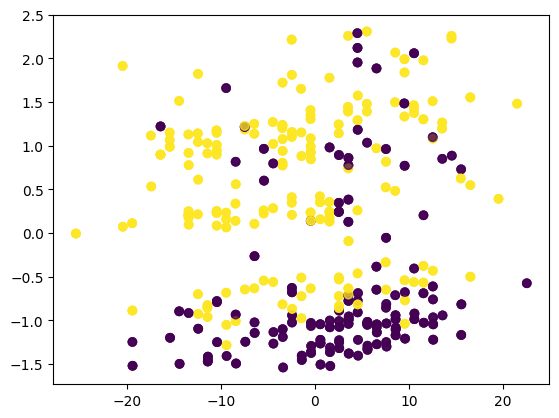

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['target']))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['target'], cmap='viridis', alpha=0.7)
plt.show()

# Model Building
### K-Nearest Neighbors

In [69]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.95      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



### SVM

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train) 

print(grid.best_params_) 
print(grid.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [73]:
# SVM
svc = SVC(C=100, gamma=0.1, kernel='rbf')
svc.fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



### Random forest

In [75]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

